In [68]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit 
import seaborn as sns
from sklearn.metrics import classification_report
from utils.util_classifier_report import *
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from six import StringIO 
from IPython.display import SVG,display
from sklearn.tree import export_graphviz
import pydotplus

mushroom_data = pd.read_csv("data/mushroom_cleaned.csv")
y = mushroom_data['class']  # Target variable
x = mushroom_data.iloc[:, :-1]
mushroom_data.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


# Data Cleaning

<Axes: title={'center': 'After'}>

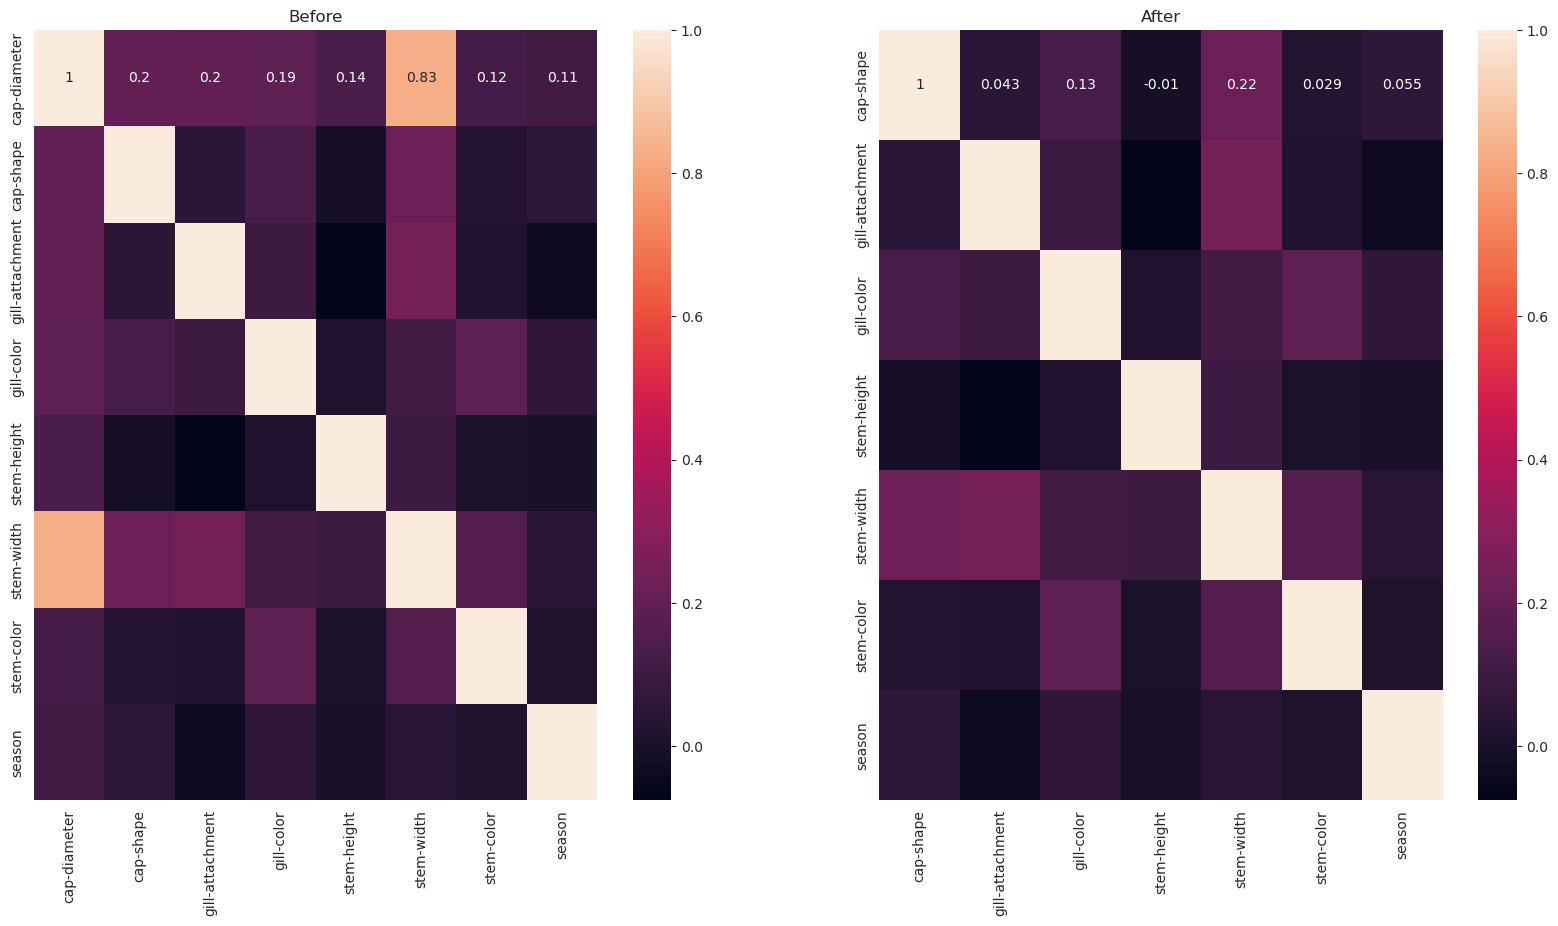

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
stratified_shuffle_split = StratifiedShuffleSplit(n_splits=1, test_size=0.30, random_state=142)

index_training_data, index_test_data = next(stratified_shuffle_split.split(x, y))
ax[0].set_title("Before")
ax[1].set_title("After")
sns.heatmap(x.corr(), annot=True, ax=ax[0])
x.drop("cap-diameter", axis=1,
       inplace=True)  # There is a high correlation  between cap-diameter and stem-width. One has to go!!

x_train_set = mushroom_data.loc[index_training_data, x.columns]
y_train_ = mushroom_data.loc[index_training_data, "class"]

x_test_set = mushroom_data.loc[index_test_data, x.columns]
y_test_ = mushroom_data.loc[index_test_data, "class"]
sns.heatmap(x.corr(), annot=True, ax=ax[1])

# Model Training

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      7308
           1       0.97      0.98      0.97      8903

    accuracy                           0.97     16211
   macro avg       0.97      0.97      0.97     16211
weighted avg       0.97      0.97      0.97     16211



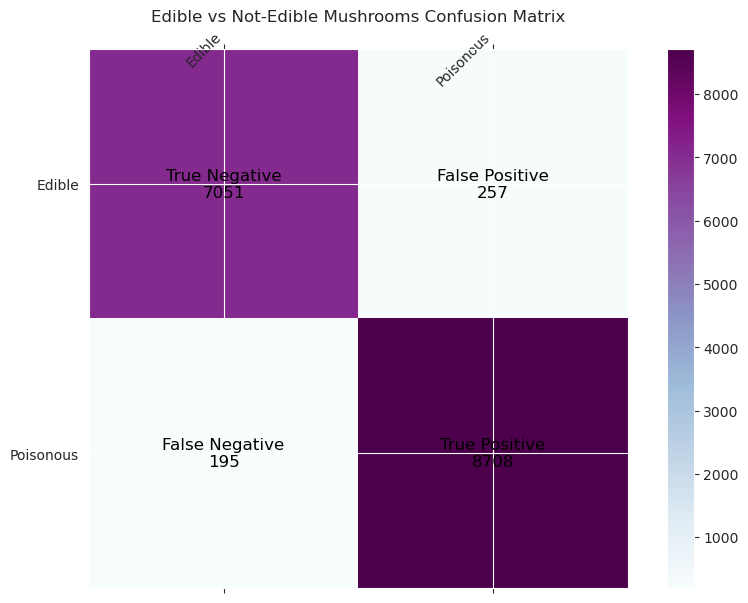

In [70]:
preprocessor = ColumnTransformer(transformers=[("num",StandardScaler(),x.columns)],remainder='passthrough') # passthrough to keep track of ramainder columns if there are any transformation of features by creating new ones

pipeline = Pipeline(steps=[
       ('preprocessor', preprocessor),('classifier', DecisionTreeClassifier(random_state=142))
])

pipeline.fit(x_train_set, y_train_)

classifier = pipeline.named_steps['classifier']
feature_names = pipeline.named_steps["preprocessor"].get_feature_names_out()

y_pred = pipeline.predict(x_test_set)
print(classification_report(y_test_, y_pred))
model_report(y_test_, y_pred)

dot_data = StringIO()
export_graphviz(classifier,out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names=x.columns,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_svg('diabetes.svg')
display(SVG(graph.create_svg()))